# Ejercicios Pair Programming - Módulo 2 Sprint 1
## Lección 2 - Estadística II
### Noemi Azorin y Silvia Gordón

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando ayer y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos
Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

In [4]:
instagram2 = pd.read_csv("./Datasets/instagram_gloabal2.csv")
instagram2.head()

,Unnamed: 0,country,rank,account,title,link,category,followers,audience_country,authentic_engagement
0,0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0
1,1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0
2,2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0
3,3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0
4,4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0


1 - Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
- Percentiles 25, 75
- Rango Intercualtílico
- Boxplot de algunas variables
- Tabla de frecuencias
- Variables cualitativas
- Variables cuantitativas
- Frecuencia acumulada
- Representación de al menos una tabla de frecuencias

Empezamos sacando la media, mediana, moda, max y min para la columna "followers".

In [8]:
media = print(instagram2["followers"].mean())
mediana = print(instagram2["followers"].median())
moda = print(instagram2["followers"].mode()[0])
maximo = print(instagram2["followers"].max())
minimo = print(instagram2["followers"].min())

24836100.0
14400000.0
7800000.0
469600000.0
2800000.0


Calculamos el cuartil 25 y el 75. Con el cuartil 1 comprobamos que el 25 % de los datos es inferior a 9000000.0.

In [9]:
percentil25 = np.nanpercentile(instagram2["followers"], 25)
percentil25

9000000.0

 Con el cuartil 3 comprobamos que el 75 % de los datos es inferior a 25650000.0.

In [10]:
percentil75 = np.nanpercentile(instagram2["followers"], 75)
percentil75

25650000.0

Sacamos el cuartil 2 y observamos que es igual a la mediana, es decir, correspondería a que el 50 % de nuestros datos es inferior a 14400000.0 y mayor al mismo.

In [11]:
percentil50 = np.nanpercentile(instagram2["followers"], 50)
percentil50

14400000.0

Sacamos el rango intercuartílico que lo usaremos para identificar los outliers.

In [12]:
inter = percentil75 - percentil25 
inter

16650000.0

Creamos el boxplot para la variable "followers".

Como se puede observar en la gráfica, tenemos muchos outliers. Esto quiere decir que el conjunto de datos está dividido de manera muy desigual, debido a que la mediana la realiza considerando datos muy heterogéneos.

Si apreciamos el top1 y el top100 vemos que hay una diferencia abismal entre ellos.

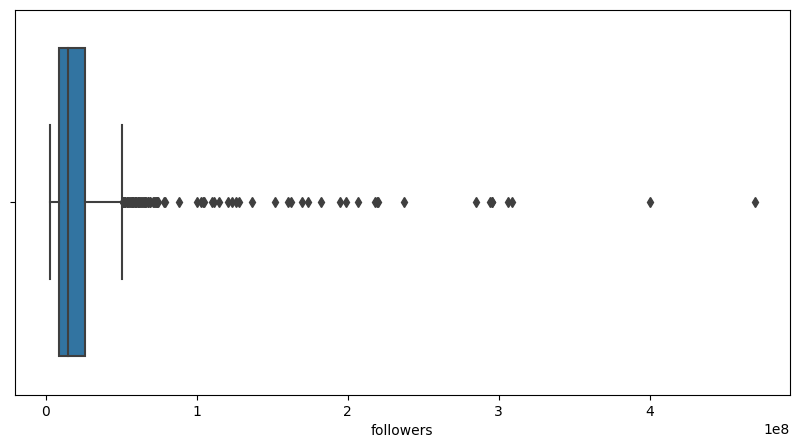

In [13]:
fig = plt.figure(figsize = (10,5))

sns.boxplot(x = instagram2["followers"])

plt.show()

Creamos boxplot para la variable "authentic_engagement".

Como se puede observar en la gráfica, tenemos muchos menos outliers que en la anterior. Esto quiere decir que la interacción es mayor, ya que los datos que presentamos son más homogéneos.

Si apreciamos el top1 y el top100 vemos que no hay ya una diferencia tan grande entre ellos.

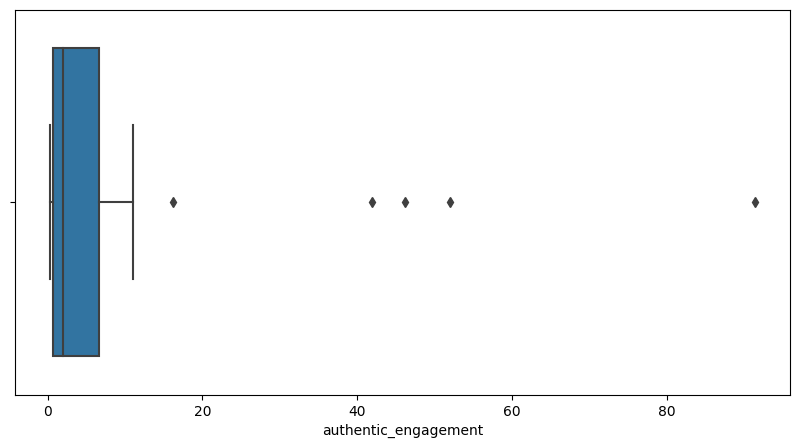

In [30]:
fig = plt.figure(figsize = (10,5))

sns.boxplot(x = instagram2["authentic_engagement"])

plt.show()

Tabla de frecuencias absoluta con variables categóricas (cualitativas)

Con la siguiente tabla de frecuencias absolutas, tras agrupar por "audience_country", vemos que nos devuelve en todas las columnas el mismo valor (en algunas difiere porque hay valores nulos). Por lo tanto, no nos aporta información decisiva.

In [15]:
df_instagram2 = instagram2.groupby("audience_country").count().reset_index()
df_instagram2.head()

,audience_country,Unnamed: 0,country,rank,account,title,link,category,followers,authentic_engagement
0,Algeria,1,1,1,1,1,1,1,1,1
1,Argentina,24,24,24,24,23,24,22,24,24
2,Brazil,161,161,161,161,159,161,150,161,161
3,Chile,1,1,1,1,1,1,1,1,1
4,China,1,1,1,1,1,1,1,1,1


Tabla de frecuencias absoluta de variables numéricas (cuantitativas)

Lo que entendemos en la siguiente tabla, el 0.32 para followers, es el que más aparece en las columnas (un total de 6 veces).

In [28]:
df_instagram3 = instagram2.groupby("followers").count().reset_index().sort_values(by = "title", ascending = False)
df_instagram3.head()

,followers,Unnamed: 0,country,rank,account,title,link,category,audience_country,authentic_engagement
0,0.322581,6,6,6,6,6,6,4,5,6
3,1.290323,3,3,3,3,3,3,2,2,3
1,0.645161,3,3,3,3,3,3,2,3,3
5,1.935484,2,2,2,2,2,2,2,2,2
11,5.483871,2,2,2,2,2,2,2,2,2


Tabla de frecuencias relativa

Para conocer la frecuencia relativa de nuestro dataset, primero eliminamos las columnas categóricas y después dividimos el dataset nuevo entre las filas del dataset completo y multiplicamos por 100 para obtener un porcentaje. Por último, para que nos aparezcan también las variables categóricas, hemos sobreescrito las columnas del primer DF.

In [17]:
df_nuevo = df_instagram2.drop(columns = ["country","account","title", "link","category","audience_country"], axis=1)
df_nuevo.head()

,Unnamed: 0,rank,followers,authentic_engagement
0,1,1,1,1
1,24,24,24,24
2,161,161,161,161
3,1,1,1,1
4,1,1,1,1


In [21]:
frecuencia_rel = (df_nuevo/instagram2.shape[0])*100
frecuencia_rel.head()

,Unnamed: 0,rank,followers,authentic_engagement
0,0.322581,0.322581,0.322581,0.322581
1,7.741935,7.741935,7.741935,7.741935
2,51.935484,51.935484,51.935484,51.935484
3,0.322581,0.322581,0.322581,0.322581
4,0.322581,0.322581,0.322581,0.322581


Aquí podemos apreciar que en el caso de "Leo Messi" la audiencia mayoritaria (con un 52 % aprox.) se encuentra en Argentina, es decir, más de la mitad de sus followers viven en Argentina. Comparandolo con "Cristiano Ronaldo", se aprecia que donde tiene más seguidores es en Índia, pero es un valor muy bajo, lo cuál nos indica que sus followers están más dispersos en el mundo.

In [23]:
columnas = df_nuevo.columns

instagram2[columnas] = frecuencia_rel

instagram2

,Unnamed: 0,country,rank,account,title,link,category,followers,audience_country,authentic_engagement
0,0.322581,All,0.322581,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,0.322581,India,0.322581
1,7.741935,All,7.741935,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,7.741935,United States,7.741935
2,51.935484,All,51.935484,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,51.935484,Argentina,51.935484
3,0.322581,All,0.322581,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,0.322581,United States,0.322581
4,0.322581,All,0.322581,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,0.322581,United States,0.322581
...,...,...,...,...,...,...,...,...,...,...
995,NaN,All,NaN,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,NaN,Russia,NaN
996,NaN,All,NaN,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,NaN,Germany,NaN
997,NaN,All,NaN,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,NaN,India,NaN
998,NaN,All,NaN,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,NaN,India,NaN


Información de la frecuencia acumulada relativa.

Conocemos la frecuencia acumulada relativa sumndo la frecuencia relativa que habíamos calculado anteriormente. Como podemos apreciar, nos da los mismos valores para todas las variables numéricas.

In [29]:
frec_acumulada = frecuencia_rel.sum()
frec_acumulada

Unnamed: 0              320.322581
rank                    320.322581
followers               320.322581
authentic_engagement    320.322581
dtype: float64

2 - Interpretación de los resultados:
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

- Los ejercicios se han ido explicando durante su realización.